In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Health Insurance Lead Prediction Raw Data.csv")
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [3]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
duplicate_column_names = df.columns[df.columns.duplicated()].tolist()

if duplicate_column_names:
    print(f"Duplicate column names: {duplicate_column_names}")
else:
    print("No duplicate column names found.")

No duplicate column names found.


In [7]:
df.drop('ID',axis=1,inplace=True)
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
df['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [9]:
df['Health Indicator'].fillna("X0",inplace=True)
df.head()

C:\Users\Nhat Nam\AppData\Local\Temp\ipykernel_13356\1086442137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health Indicator'].fillna("X0",inplace=True)


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,X0,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [10]:
df['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [11]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(to_replace="14+",value="15")

In [12]:
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'],errors="coerce")

In [13]:
df['Holding_Policy_Duration'].fillna(0,inplace=True)

C:\Users\Nhat Nam\AppData\Local\Temp\ipykernel_13356\3408477072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Holding_Policy_Duration'].fillna(0,inplace=True)


In [14]:
df['Holding_Policy_Type'].fillna(0,inplace=True)

C:\Users\Nhat Nam\AppData\Local\Temp\ipykernel_13356\279527666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Holding_Policy_Type'].fillna(0,inplace=True)


In [15]:
df.drop('Region_Code',inplace=True,axis=1)

## Data Visualization

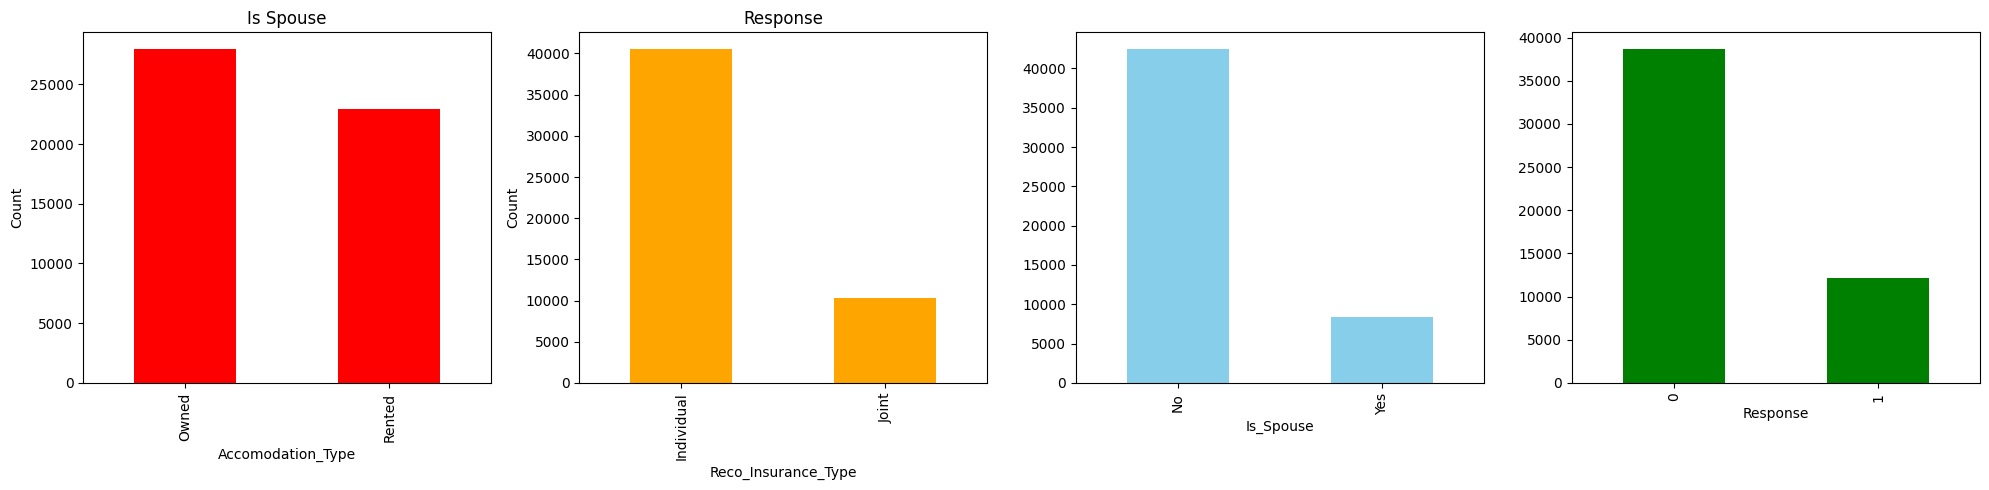

In [16]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
# Accomodation_Type
df['Accomodation_Type'].value_counts().plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Accomodation Type')
axes[0].set_ylabel('Count')

# Reco_Insurance_Type
df['Reco_Insurance_Type'].value_counts().plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Recommended Insurance Type')
axes[1].set_ylabel('Count')

# Is_Spouse
df['Is_Spouse'].value_counts().plot(kind='bar', ax=axes[2], color='skyblue')
axes[0].set_title('Is Spouse')
axes[0].set_ylabel('Count')

# Response
df['Response'].value_counts().plot(kind='bar', ax=axes[3], color='green')
axes[1].set_title('Response')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

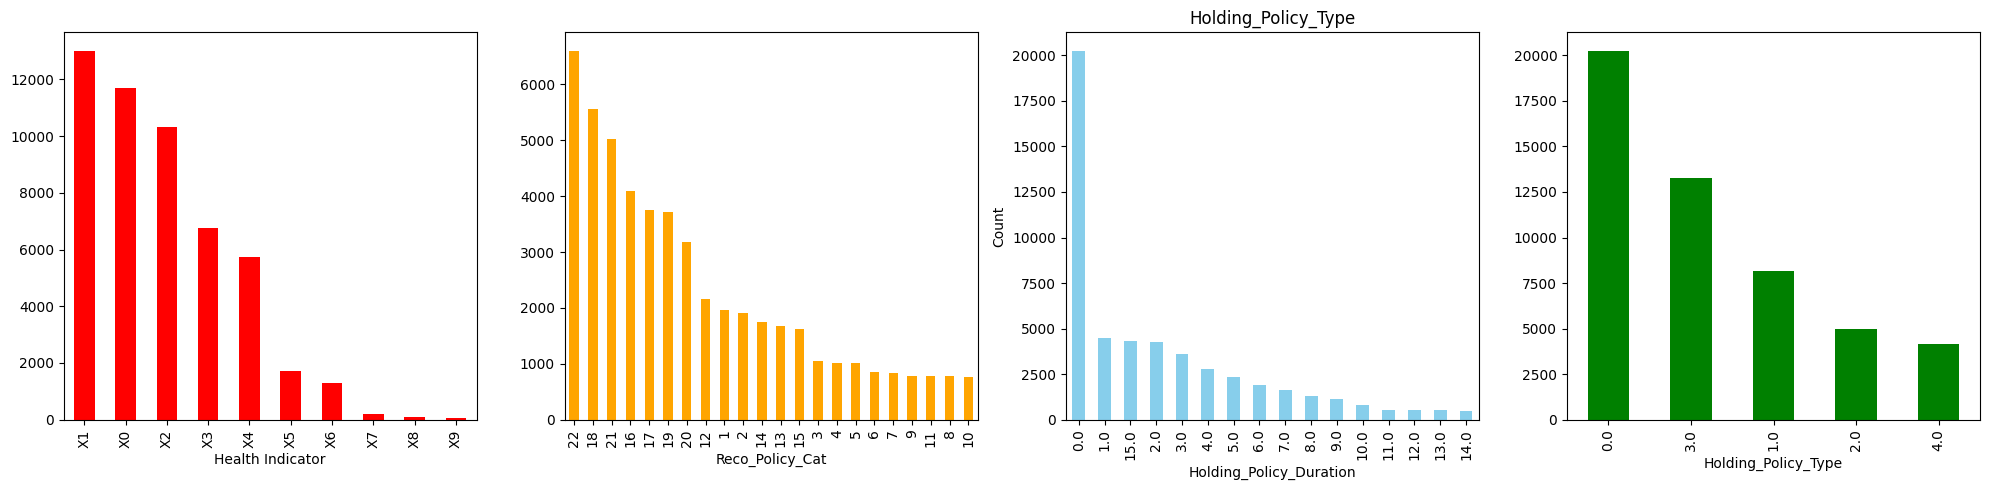

In [17]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
# Health_Indicator
df['Health Indicator'].value_counts().plot(kind='bar', ax=axes[0], color='red')
axes[2].set_title('Health Indicator')
axes[2].set_ylabel('Count')

# Reco_Policy_Cat
df['Reco_Policy_Cat'].value_counts().plot(kind='bar', ax=axes[1], color='orange')
axes[2].set_title('Reco Policy Cat')
axes[2].set_ylabel('Count')

# Holding_Policy_Duration
df['Holding_Policy_Duration'].value_counts().plot(kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Holding Policy Duration')
axes[2].set_ylabel('Count')

# Holding_Policy_Type
df['Holding_Policy_Type'].value_counts().plot(kind='bar', ax=axes[3], color='green')
axes[2].set_title('Holding_Policy_Type')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [18]:
df.to_csv('Health_Insurance_Lead_Prediction_Data_Cleaning.csv',index=False,encoding='utf-8-sig')